In [23]:

#importing libraries for model evaluation and algorithms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from IPython.display import display
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from sklearn.metrics import confusion_matrix
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [17]:
#reading the dataframe
df=pd.read_csv('Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [18]:
#train test split
data_train, data_test= train_test_split(df,test_size = 0.2, random_state = 100)

In [24]:
#defining train labels i.e-dependent variable
train_labels=[label for label in data_train['airline_sentiment']]   
#word tokenization of train and test tweets
train_tweets=[word_tokenize(tweet) for tweet in data_train['text']]
test_tweets=[word_tokenize(tweet) for tweet in data_test['text']]
#list of stopwords and punctuations
from nltk.corpus import stopwords
import string
stops = set(stopwords.words('english'))
punctuations = list(string.punctuation)
#stops include stopwords and punctuations which would later be eliminated
stops.update(punctuations)

In [25]:
# now we will create our list of documents from the files
# each entry of the list is a tuple
# tuple contains 1.all words of a particular document 2.Label of that document
train_docs=[]
for j in range(0,len(train_tweets)):
    train_docs.append((train_tweets[j],train_labels[j]))
#to get the simple pos(part of speech) tag
from nltk.corpus import wordnet
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [27]:
#to get the pos tag for a word
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
# now we are going to clean our data 
# we will remove stopwords and punctuations and lemmatize each document
lemmatizer=WordNetLemmatizer()
def clean(words):
    output=[]
    for word in words:
        if word.lower() not in stops:
            pos=pos_tag(word)
            clean_word=lemmatizer.lemmatize(word,pos=get_simple_pos(pos[0][1]))
            output.append(clean_word.lower())
    return output
train_docs=[(clean(doc),label) for doc,label in train_docs]
test_docs=[ clean(doc) for doc in test_tweets]

In [28]:
#Lets look at how each of the values of train_docs look
train_docs[5]

(['americanair',
  'car',
  'gng',
  'dfw',
  'pulled',
  '1hr',
  'ago',
  'icy',
  'road',
  'on-hold',
  'aa',
  'since',
  '1hr',
  'ca',
  "n't",
  'reach',
  'arpt',
  'aa2450',
  'wat',
  '2'],
 'negative')

In [29]:
#creating a list of all words that are in the documents after cleaning
all_words = []
for doc in train_docs:
    all_words += doc[0]
#to find the 2500 most frequent words which will act as features
import nltk
freq = nltk.FreqDist(all_words)
common = freq.most_common(2500)
features = [i[0] for i in common]

In [30]:
#Here I am going to return a dictionary which contains true and false tags for the top 2500 words in each line of text on the basis of whether
# they are present in that document 
def get_feature_dict(words):
    current_features = {}
    words_set = set(words)
    for w in features:
        current_features[w] = w in words_set
    return current_features
training_data = [(get_feature_dict(doc),category) for doc, category in train_docs]
testing_data = [get_feature_dict(doc) for doc  in test_docs]

In [31]:
#Lets look at how each of the training data sample looks like
training_data[0]

({'united': False,
  'flight': True,
  'usairways': False,
  'americanair': True,
  'southwestair': False,
  'jetblue': False,
  "n't": False,
  "'s": False,
  'get': False,
  'http': False,
  'hour': False,
  'thanks': False,
  'cancelled': False,
  '...': False,
  'service': False,
  'customer': False,
  'time': False,
  'help': True,
  'call': False,
  'bag': False,
  'plane': False,
  "'m": False,
  'amp': False,
  'flights': False,
  'us': False,
  'hold': False,
  '2': False,
  'would': False,
  'still': False,
  'thank': False,
  'please': True,
  'need': False,
  'make': False,
  'one': False,
  'back': False,
  'ca': False,
  'gate': False,
  'delayed': False,
  'flightled': False,
  'virginamerica': False,
  'airline': False,
  'say': False,
  'got': False,
  'seat': False,
  "'ve": False,
  "''": False,
  '``': False,
  'phone': False,
  'delay': False,
  'like': False,
  'late': False,
  'guy': True,
  'today': False,
  'agent': False,
  'take': False,
  'fly': False,
  'kn

In [32]:
#importing Naive Bayes Classifier from nltk
from nltk import NaiveBayesClassifier as nbayes
#training naive bayes on training data and predicting on the testing_data
clf=nbayes.train(training_data)
predicted_labels=[clf.classify(test) for test in testing_data]

[Text(69.0, 0.5, 'Predicted Sentiment'), Text(0.5, 69.0, 'Actual Sentiment')]

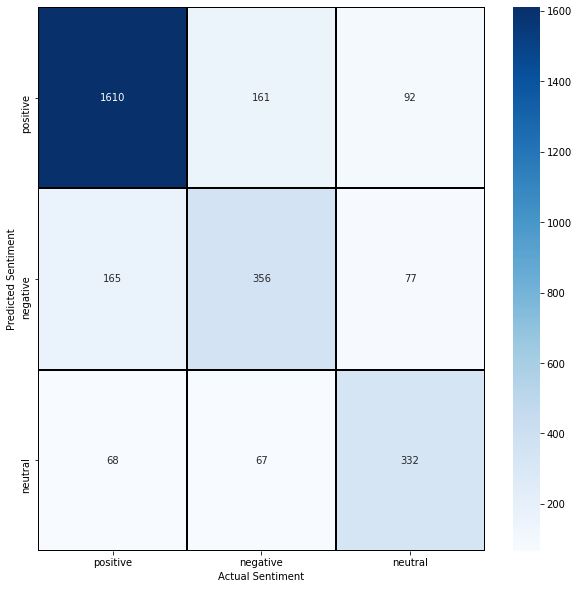

In [33]:
#to plot a confusion matrix
cm=confusion_matrix(data_test['airline_sentiment'],predicted_labels)
cm1 = pd.DataFrame(cm , index = ['positive','negative','neutral'] , columns = ['positive','negative','neutral'])
plt.figure(figsize = (10,10))
ax=sns.heatmap(cm1,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')
ax.set(xlabel="Actual Sentiment", ylabel = "Predicted Sentiment")

In [34]:
#Here I have considered the positive tweets to be our positive class and the rest as negative class and hence evaluated the below paramters
accuracy=metrics.accuracy_score(data_test['airline_sentiment'],predicted_labels)
TP=cm[0,0]
TN=cm[1,1]+cm[1,2]+cm[2,1]+cm[2,2]
FP=cm[0,1]+cm[0,2]
FN=cm[1,0]+cm[2,0]
precision=TP/(TP+FP)
recall=TP/(TP+FN)
f1_score=2*precision*recall/(precision+recall)
specificity=(TN)/(TN+FP)
FPR=1-specificity

In [35]:
#displaying the evaluation parameters
from IPython.display import display
out,a={},[]
out['Accuracy']=accuracy
out['Precision']=precision
out['Recall']=recall
out['F1_Score']=f1_score
out['Specificity']=specificity
out['FPR']=FPR
a.append(out)
Class_Algo_dt1= round(pd.DataFrame(a,index=['Model evaluations']),2)
display(Class_Algo_dt1)

,Accuracy,Precision,Recall,F1_Score,Specificity,FPR
Model evaluations,0.78,0.86,0.87,0.87,0.77,0.23
